In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import plotly.express as px

In [3]:
df = pd.read_csv("completeDataset_inference.csv")

In [4]:
len(df)

1021221

In [5]:
df_hate = df[df['model_inference'] == 'hate']

In [6]:
len(df_hate)

58195

In [7]:
df_hate.head()

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score
11,2022-01-01 23:57:53+00:00,oh boy.... so russia is like an ape with an a...,@MavkaSlavka Oh boy.... So Russia is like an a...,https://twitter.com/wolframstahl/status/147742...,1477428898891812870,11,hate,0.2077,0.7923
19,2022-01-01 23:54:55+00:00,then get the hell out of russia ted. wtaf??? d...,Then get the hell out of Russia Ted. WTAF??? D...,https://twitter.com/pchurch69/status/147742815...,1477428151655583747,19,hate,0.0675,0.9325
28,2022-01-01 23:53:41+00:00,russia destroys the chechen people via,Russia destroys the Chechen people https://t.c...,https://twitter.com/misirbiev59/status/1477427...,1477427843395162115,28,hate,0.0147,0.9854
50,2022-01-01 23:51:35+00:00,russia 🇷🇺 is the definition of based that why...,@OnlyFansPostinL Russia 🇷🇺 is the definition o...,https://twitter.com/theseriousjones/status/147...,1477427313155452928,50,hate,0.1481,0.8519
80,2022-01-01 23:45:04+00:00,"your fact is ""russia collusion"", and aoc is b...","@AdverseReaction Your fact is ""russia collusio...",https://twitter.com/PatriotsOfMars/status/1477...,1477425675359428609,80,hate,0.0844,0.9156


In [8]:
df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:11])

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_20256\3899987318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:11])


In [9]:
df_hate.head()

,Date,Tweet Treated,Tweet Raw,Url,Id,index,model_inference,normal_score,hate_speech_score,Date Trunc
11,2022-01-01 23:57:53+00:00,oh boy.... so russia is like an ape with an a...,@MavkaSlavka Oh boy.... So Russia is like an a...,https://twitter.com/wolframstahl/status/147742...,1477428898891812870,11,hate,0.2077,0.7923,2022-01-01
19,2022-01-01 23:54:55+00:00,then get the hell out of russia ted. wtaf??? d...,Then get the hell out of Russia Ted. WTAF??? D...,https://twitter.com/pchurch69/status/147742815...,1477428151655583747,19,hate,0.0675,0.9325,2022-01-01
28,2022-01-01 23:53:41+00:00,russia destroys the chechen people via,Russia destroys the Chechen people https://t.c...,https://twitter.com/misirbiev59/status/1477427...,1477427843395162115,28,hate,0.0147,0.9854,2022-01-01
50,2022-01-01 23:51:35+00:00,russia 🇷🇺 is the definition of based that why...,@OnlyFansPostinL Russia 🇷🇺 is the definition o...,https://twitter.com/theseriousjones/status/147...,1477427313155452928,50,hate,0.1481,0.8519,2022-01-01
80,2022-01-01 23:45:04+00:00,"your fact is ""russia collusion"", and aoc is b...","@AdverseReaction Your fact is ""russia collusio...",https://twitter.com/PatriotsOfMars/status/1477...,1477425675359428609,80,hate,0.0844,0.9156,2022-01-01


In [10]:
cnt = df_hate[['Date Trunc']].groupby(['Date Trunc'])['Date Trunc'].count()

cnt = pd.DataFrame({'date':cnt.index, 'cnt':cnt.values})

<Axes: xlabel='date', ylabel='cnt'>

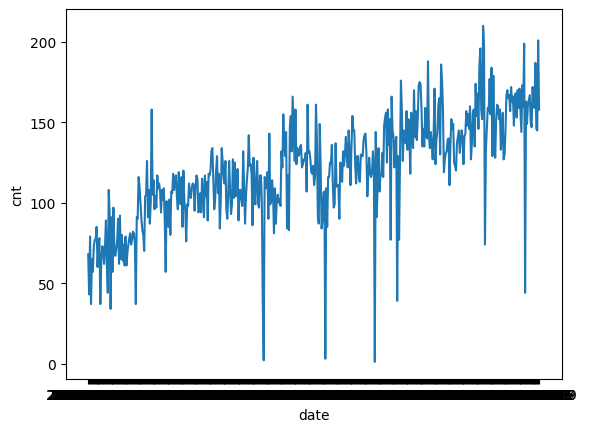

In [11]:
import seaborn as sns

sns.lineplot(data=cnt, x='date', y='cnt')

In [12]:
df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:10])

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_20256\2477967178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hate['Date Trunc'] = df_hate['Date'].apply(lambda dt: dt[:10])


In [13]:
cnt = df_hate[['Date Trunc']].groupby(['Date Trunc'])['Date Trunc'].count()

cnt = pd.DataFrame({'date':cnt.index, 'cnt':cnt.values})

<Axes: xlabel='date', ylabel='cnt'>

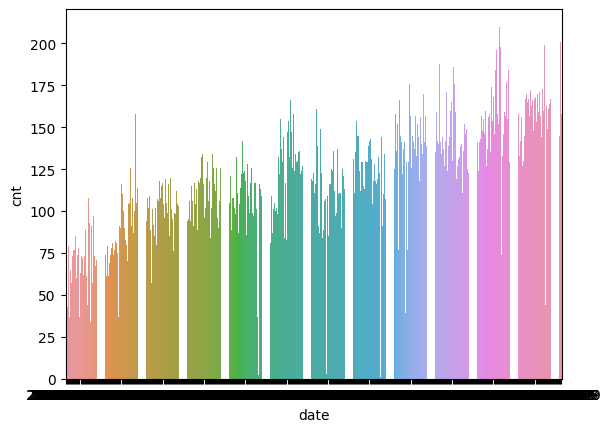

In [14]:
sns.barplot(data=cnt, x='date', y='cnt')

In [15]:
fig = px.line(cnt, x='date', y='cnt')
fig.show()

In [16]:
cnt

,date,cnt
0,2022-01-01,68
1,2022-01-02,43
2,2022-01-03,79
3,2022-01-04,37
4,2022-01-05,65
...,...,...
479,2023-04-25,187
480,2023-04-26,146
481,2023-04-27,145
482,2023-04-28,201


In [17]:
cnt['date'] = pd.to_datetime(cnt['date'])

In [18]:
fig = px.scatter(cnt, x="date", y="cnt", color='cnt', trendline="ols", trendline_color_override="black")
fig.show()

In [19]:
df_news = pd.read_csv("completeDatasetNews.csv")

In [23]:
df_news_likes = df_news[['Date', 'Likes']]
df_news_likes['Date'] = df_news_likes['Date'].apply(lambda dt: dt[:11])

C:\Users\Alexandre\AppData\Local\Temp\ipykernel_20256\149700250.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
df_news_likes

,Date,Likes
0,2022-01-01,163
1,2022-01-01,178
2,2022-01-01,458
3,2022-01-02,8
4,2022-01-02,13
...,...,...
24267,2023-04-29,435
24268,2023-04-29,456
24269,2023-04-29,82
24270,2023-04-29,109


In [48]:
max_news = df_news_likes[['Date', 'Likes']].groupby(['Date'])['Likes'].max()
max_news = pd.DataFrame({'date':max_news.index, 'max':max_news.values})

In [49]:
max_news

,date,max
0,2022-01-01,458
1,2022-01-02,589
2,2022-01-03,257
3,2022-01-04,282
4,2022-01-05,143
...,...,...
479,2023-04-25,453
480,2023-04-26,789
481,2023-04-27,485
482,2023-04-28,521


In [50]:
fig2 = px.scatter(max_news, x="date", y="max", color='max')
fig2.show()

In [52]:
sum_news = df_news_likes[['Date', 'Likes']].groupby(['Date'])['Likes'].sum()
sum_news = pd.DataFrame({'date':sum_news.index, 'sum':sum_news.values})

fig3 = px.scatter(sum_news, x="date", y="sum", color='sum')
fig3.show()

In [65]:
avg_news = df_news_likes[['Date', 'Likes']].groupby(['Date'])['Likes'].mean()
avg_news = pd.DataFrame({'date':avg_news.index, 'avg':avg_news.values})

fig4 = px.scatter(avg_news, x="date", y="avg", color='avg')
fig4.show()

In [68]:
cnt_news = df_news_likes[['Date']].groupby(['Date'])['Date'].count()
cnt_news = pd.DataFrame({'date':cnt_news.index, 'cnt':cnt_news.values})

fig4 = px.scatter(cnt_news, x="date", y="cnt", color='cnt')
fig4.show()

In [67]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig_double = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig_double.add_trace(
    go.Scatter(x=cnt['date'], y=cnt['cnt'], name="Hate Amount"),
    secondary_y=False,
)

fig_double.add_trace(
    go.Scatter(x=avg_news['date'], y=avg_news['avg'], name="Max Likes News"),
    secondary_y=True,
)

fig_double.show()